In [135]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

#Cross validation libraries
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [84]:
#importing with csv
csvdata = pd.read_csv('salary_data.csv')
csvdata

,Name,Team,Number,Position,Age,DOJ,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41,PF,20,06-Oct,234,Kentucky,2239800.0
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0


In [85]:
#importing dataset using mysql

#!pip install mysql-connector-python

In [86]:
import mysql.connector

In [87]:
#Comment this block if sql server not connected

import pandas as pd
con = mysql.connector.connect(
    host="localhost",
    port=3306,
    user = "root",
    password="root1234",
    database = "ml_dataset"
)

sqldata = pd.read_sql_query("SELECT * FROM salary_dataset",con)
sqldata
sqldata.head(20)

,Name,Team,Number,Position,Age,DOJ,Weight,College,Salary
0,Aaron Brooks,Chicago Bulls,0,PG,31,6-0,161,Oregon,2250000.0
1,Aaron Gordon,Orlando Magic,0,PF,20,06-Sep,220,Arizona,4171680.0
2,Aaron Harrison,Charlotte Hornets,9,SG,21,06-Jun,210,Kentucky,525093.0
3,Adreian Payne,Minnesota Timberwolves,33,PF,25,06-Oct,237,Michigan State,1938840.0
4,Al Horford,Atlanta Hawks,15,C,30,06-Oct,245,Florida,12000000.0
5,Al Jefferson,Charlotte Hornets,25,C,31,06-Oct,289,None,13500000.0
6,Al-Farouq Aminu,Portland Trail Blazers,8,SF,25,06-Sep,215,Wake Forest,8042895.0
7,Alan Anderson,Washington Wizards,6,SG,33,06-Jun,220,Michigan State,4000000.0
8,Alan Williams,Phoenix Suns,15,C,23,06-Aug,260,UC Santa Barbara,83397.0
9,Alec Burks,Utah Jazz,10,SG,24,06-Jun,214,Colorado,9463484.0


In [88]:
csvdata.size

4113

In [89]:
sqldata.size

4113

In [90]:
csvdata.shape

(457, 9)

In [91]:
sqldata.shape

(457, 9)

In [92]:
data = sqldata #----> comment if sql not connected
#data = csvdata #----> comment if fetching from sql

In [93]:
data

,Name,Team,Number,Position,Age,DOJ,Weight,College,Salary
0,Aaron Brooks,Chicago Bulls,0,PG,31,6-0,161,Oregon,2250000.0
1,Aaron Gordon,Orlando Magic,0,PF,20,06-Sep,220,Arizona,4171680.0
2,Aaron Harrison,Charlotte Hornets,9,SG,21,06-Jun,210,Kentucky,525093.0
3,Adreian Payne,Minnesota Timberwolves,33,PF,25,06-Oct,237,Michigan State,1938840.0
4,Al Horford,Atlanta Hawks,15,C,30,06-Oct,245,Florida,12000000.0
...,...,...,...,...,...,...,...,...,...
452,Wilson Chandler,Denver Nuggets,21,SF,29,06-Aug,225,DePaul,10449438.0
453,Xavier Munford,Memphis Grizzlies,14,PG,24,06-Mar,180,Rhode Island,NaN
454,Zach LaVine,Minnesota Timberwolves,8,PG,21,06-May,189,UCLA,2148360.0
455,Zach Randolph,Memphis Grizzlies,50,PF,34,06-Sep,260,Michigan State,9638555.0


In [94]:
res = pd.read_sql_query("select distinct(Position) from salary_dataset",con)
res

,Position
0,PG
1,PF
2,SG
3,C
4,SF


In [95]:
data.dtypes

Name         object
Team         object
Number        int64
Position     object
Age           int64
DOJ          object
Weight        int64
College      object
Salary      float64
dtype: object

In [96]:
df = pd.DataFrame(data)
df

,Name,Team,Number,Position,Age,DOJ,Weight,College,Salary
0,Aaron Brooks,Chicago Bulls,0,PG,31,6-0,161,Oregon,2250000.0
1,Aaron Gordon,Orlando Magic,0,PF,20,06-Sep,220,Arizona,4171680.0
2,Aaron Harrison,Charlotte Hornets,9,SG,21,06-Jun,210,Kentucky,525093.0
3,Adreian Payne,Minnesota Timberwolves,33,PF,25,06-Oct,237,Michigan State,1938840.0
4,Al Horford,Atlanta Hawks,15,C,30,06-Oct,245,Florida,12000000.0
...,...,...,...,...,...,...,...,...,...
452,Wilson Chandler,Denver Nuggets,21,SF,29,06-Aug,225,DePaul,10449438.0
453,Xavier Munford,Memphis Grizzlies,14,PG,24,06-Mar,180,Rhode Island,NaN
454,Zach LaVine,Minnesota Timberwolves,8,PG,21,06-May,189,UCLA,2148360.0
455,Zach Randolph,Memphis Grizzlies,50,PF,34,06-Sep,260,Michigan State,9638555.0


In [97]:
df['Number'].unique()

array([ 0,  9, 33, 15, 25,  8,  6, 10, 21, 35, 42, 23,  5, 90, 18, 24, 12,
       44, 22,  3,  2, 43, 20,  4, 32, 40, 34, 55, 11, 31, 30, 41,  7,  1,
       45, 17, 14, 26, 28, 99, 13, 19, 39, 50, 77, 27, 36, 92, 37, 52, 88,
       54, 16], dtype=int64)

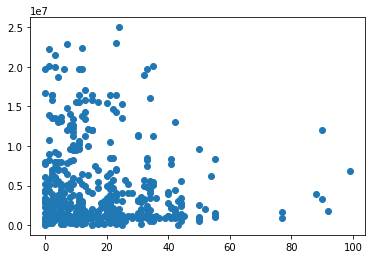

In [98]:
plt.scatter(df['Number'],df['Salary'])

In [99]:
df.isnull().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
DOJ          0
Weight       0
College     84
Salary      11
dtype: int64

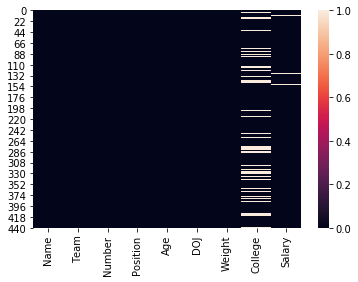

In [100]:
sns.heatmap(df.isnull())

In [101]:
#Removing NaN values from salary 

df_new = df.dropna(subset=['Salary'])

In [102]:
df.shape


(457, 9)

In [103]:
df_new.shape

(446, 9)

In [104]:
df['College'].unique()

array(['Oregon', 'Arizona', 'Kentucky', 'Michigan State', 'Florida', None,
       'Wake Forest', 'UC Santa Barbara', 'Colorado', 'Maryland', 'USC',
       'California', 'Alabama', 'Connecticut', 'Utah', 'Charleston',
       'St. Bonaventure', 'Kansas', 'Stanford', 'Georgia Tech',
       'Creighton', 'Washington State', 'UCLA', 'Duke', 'Texas',
       'Oklahoma', 'Arkansas', 'North Carolina', 'LSU', 'Dayton',
       'Virginia Commonwealth', 'Providence', 'Iowa State', 'Lehigh',
       'Tennessee', 'Washington', 'New Mexico', 'Murray State', 'Purdue',
       'Syracuse', 'Blinn College', 'Central Michigan', 'UNLV',
       'Wichita State', 'Indiana', 'Western Kentucky', 'Ohio State',
       'Weber State', 'Villanova', 'Xavier', 'Texas A&M', 'Missouri',
       'Illinois', 'Memphis', 'Wisconsin', 'Iowa', 'Marquette',
       'Louisiana-Lafayette', 'Oregon State', 'Vanderbilt', 'IUPUI',
       'Michigan', 'Butler', 'Louisville', 'Georgetown', 'Fresno State',
       'Marshall', 'Belmont', 'Nort

In [105]:
col_sal = ([df_new.groupby('College')["Salary"].value_counts(normalize=True)])
col_sal

[College    Salary   
 Alabama    845059.0     0.333333
            1320000.0    0.333333
            2100000.0    0.333333
 Arizona    947276.0     0.153846
            4000000.0    0.153846
                           ...   
 Wisconsin  1646400.0    0.200000
            2612520.0    0.200000
            4053446.0    0.200000
 Wyoming    1155600.0    1.000000
 Xavier     1499187.0    1.000000
 Name: Salary, Length: 356, dtype: float64]

In [106]:
#Droping name and college

sdata = df_new.drop(['Name','College','Number'],axis=1)
sdata.head()

,Team,Position,Age,DOJ,Weight,Salary
0,Chicago Bulls,PG,31,6-0,161,2250000.0
1,Orlando Magic,PF,20,06-Sep,220,4171680.0
2,Charlotte Hornets,SG,21,06-Jun,210,525093.0
3,Minnesota Timberwolves,PF,25,06-Oct,237,1938840.0
4,Atlanta Hawks,C,30,06-Oct,245,12000000.0


In [107]:
from sklearn.preprocessing import LabelEncoder as LE

dlist = ['Team','Position','DOJ']

for col in dlist:
    sdata[col] = le.fit_transform(sdata[col])

In [108]:
sdata

,Team,Position,Age,DOJ,Weight,Salary
0,4,2,31,16,161,2250000.0
1,21,1,20,12,220,4171680.0
2,3,4,21,7,210,525093.0
3,17,1,25,11,237,1938840.0
4,0,0,30,11,245,12000000.0
...,...,...,...,...,...,...
451,2,1,26,11,220,947276.0
452,7,3,29,3,225,10449438.0
454,17,2,21,9,189,2148360.0
455,14,1,34,12,260,9638555.0


In [109]:
sdata.dtypes

Team          int32
Position      int32
Age           int64
DOJ           int32
Weight        int64
Salary      float64
dtype: object

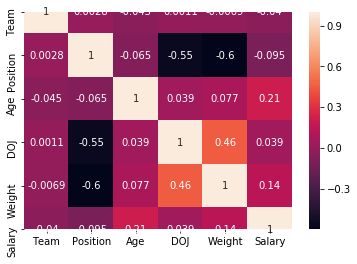

In [110]:
sns.heatmap(sdata.corr(),annot=True)

In [111]:
sdata.describe()

,Team,Position,Age,DOJ,Weight,Salary
count,446.000000,446.000000,446.000000,446.000000,446.000000,4.460000e+02
mean,14.569507,2.065022,26.919283,8.513453,221.753363,4.842684e+06
std,8.655887,1.411919,4.398951,4.155792,26.157899,5.229238e+06
min,0.000000,0.000000,19.000000,0.000000,161.000000,3.088800e+04
25%,7.000000,1.000000,24.000000,6.000000,200.000000,1.044792e+06
50%,15.000000,2.000000,26.000000,9.000000,220.000000,2.839073e+06
75%,22.000000,3.000000,30.000000,11.000000,240.000000,6.500000e+06
max,29.000000,4.000000,40.000000,17.000000,307.000000,2.500000e+07


In [112]:
#From above chart we can say that Outliers are present

Team           AxesSubplot(0.125,0.536818;0.168478x0.343182)
Position    AxesSubplot(0.327174,0.536818;0.168478x0.343182)
Age         AxesSubplot(0.529348,0.536818;0.168478x0.343182)
DOJ         AxesSubplot(0.731522,0.536818;0.168478x0.343182)
Weight            AxesSubplot(0.125,0.125;0.168478x0.343182)
Salary         AxesSubplot(0.327174,0.125;0.168478x0.343182)
dtype: object

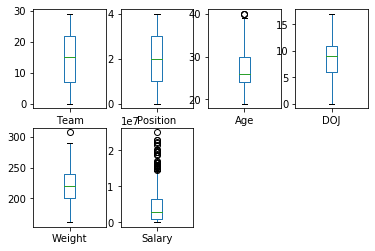

In [113]:
sdata.plot(kind='box',subplots=True,layout=(2,4))

In [114]:
#removing outliers
from scipy.stats import zscore
z = np.abs(zscore(sdata))
z

array([[1.22244855, 0.04610423, 0.9286986 , 1.8034961 , 2.32517099,
        0.49636215],
       [0.74373832, 0.75515548, 1.57470542, 0.83990309, 0.06710524,
        0.12846187],
       [1.3381066 , 1.37199827, 1.34712324, 0.36458816, 0.44982825,
        0.82659078],
       ...,
       [0.28110612, 0.04610423, 1.34712324, 0.11720834, 1.25354657,
        0.51582084],
       [0.06586804, 0.75515548, 1.61144515, 0.83990309, 1.46378679,
        0.91815612],
       [0.99113245, 1.46420673, 1.15628078, 0.35810659, 2.0378713 ,
        0.06840713]])

In [115]:
sdata = sdata[(z<3).all(axis=1)]

Team           AxesSubplot(0.125,0.536818;0.168478x0.343182)
Position    AxesSubplot(0.327174,0.536818;0.168478x0.343182)
Age         AxesSubplot(0.529348,0.536818;0.168478x0.343182)
DOJ         AxesSubplot(0.731522,0.536818;0.168478x0.343182)
Weight            AxesSubplot(0.125,0.125;0.168478x0.343182)
Salary         AxesSubplot(0.327174,0.125;0.168478x0.343182)
dtype: object

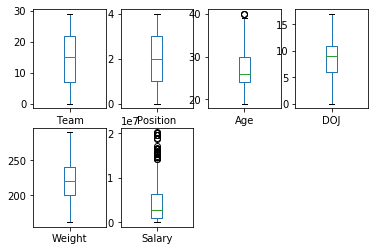

In [116]:
sdata.plot(kind='box',subplots=True,layout=(2,4))

In [117]:
sdata.skew()

Team       -0.018341
Position   -0.013390
Age         0.652221
DOJ         0.192458
Weight      0.075448
Salary      1.487380
dtype: float64

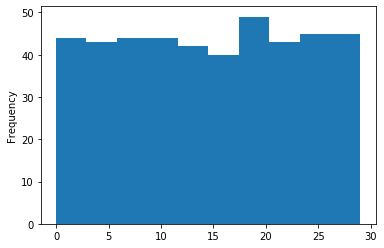

In [118]:
sdata['Team'].plot.hist()

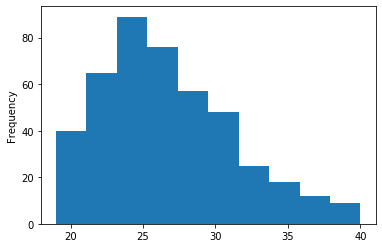

In [119]:
sdata['Age'].plot.hist()

In [120]:
age_skew = np.sqrt(sdata['Age'])
sdata['Age'] = age_skew

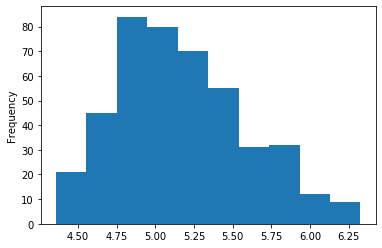

In [121]:
sdata['Age'].plot.hist()

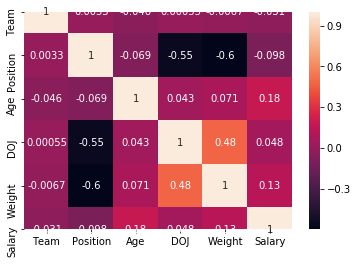

In [122]:
sns.heatmap(sdata.corr(),annot=True)

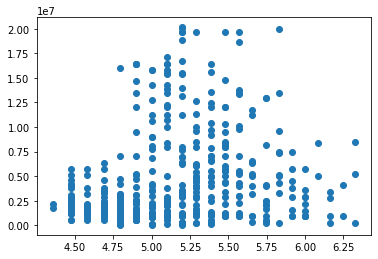

In [123]:
plt.scatter(sdata['Age'],sdata['Salary'])
plt.show()

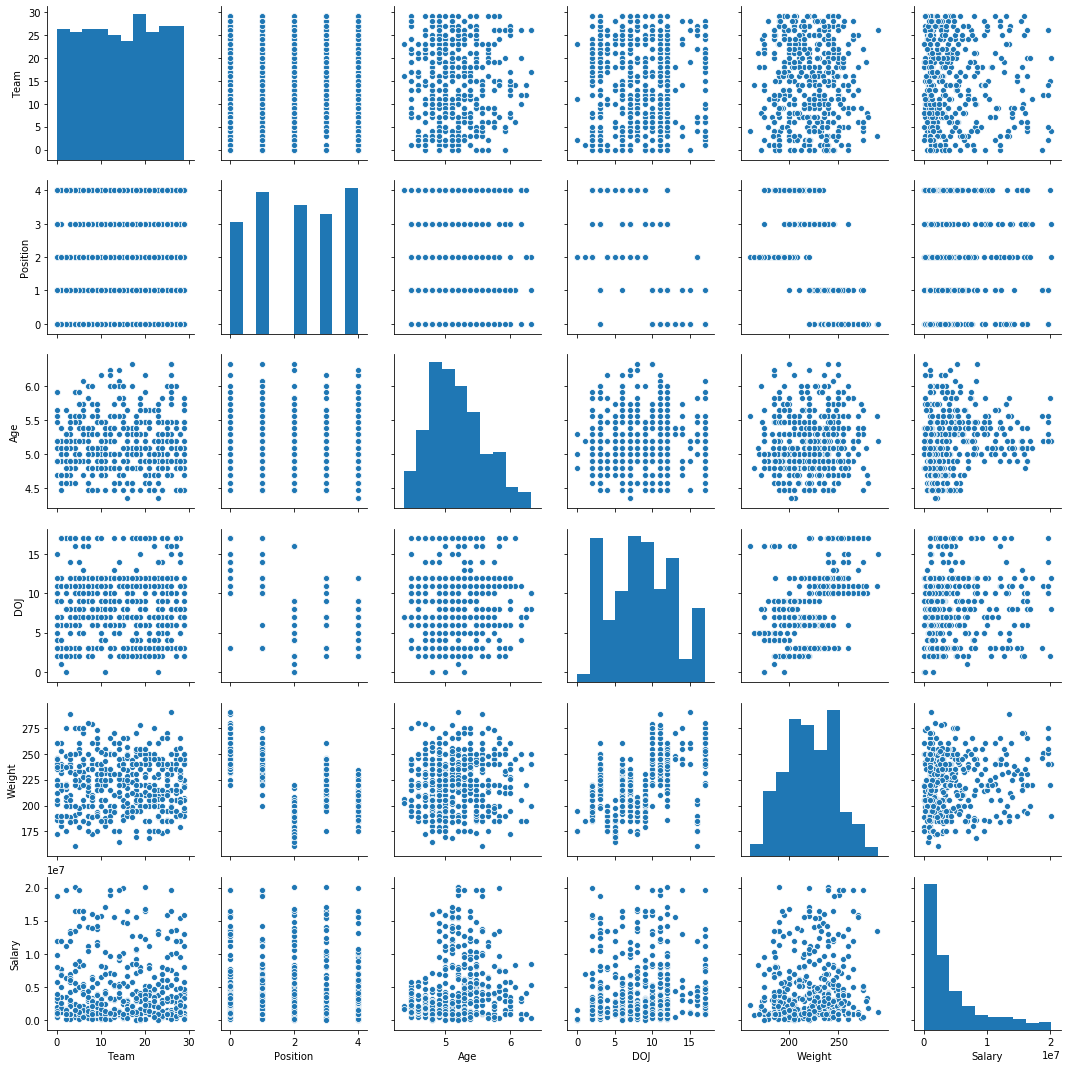

In [124]:
sns.pairplot(sdata)

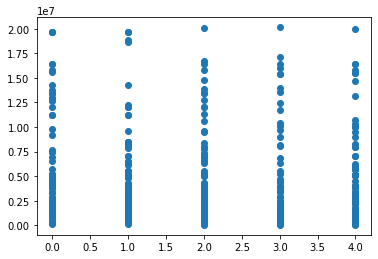

In [125]:
plt.scatter(sdata['Position'],sdata['Salary'])

### TRAINING THE MODEL

In [126]:
sdata.head()

,Team,Position,Age,DOJ,Weight,Salary
0,4,2,5.567764,16,161,2250000.0
1,21,1,4.472136,12,220,4171680.0
2,3,4,4.582576,7,210,525093.0
3,17,1,5.000000,11,237,1938840.0
4,0,0,5.477226,11,245,12000000.0


In [127]:
x = sdata.iloc[:,0:-1]
y = sdata.Salary

In [128]:
x

,Team,Position,Age,DOJ,Weight
0,4,2,5.567764,16,161
1,21,1,4.472136,12,220
2,3,4,4.582576,7,210
3,17,1,5.000000,11,237
4,0,0,5.477226,11,245
...,...,...,...,...,...
451,2,1,5.099020,11,220
452,7,3,5.385165,3,225
454,17,2,4.582576,9,189
455,14,1,5.830952,12,260


In [129]:
y

0       2250000.0
1       4171680.0
2        525093.0
3       1938840.0
4      12000000.0
          ...    
451      947276.0
452    10449438.0
454     2148360.0
455     9638555.0
456     5200000.0
Name: Salary, Length: 439, dtype: float64

In [130]:
def test_model(model):
    max_r_score = 0

    for r_state in range(42,101):
        train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=r_state)
        model.fit(train_x,train_y)
        pred = model.predict(test_x)
        r2_scr  = r2_score(test_y,pred)
        if r2_scr > max_r_score:
            max_r_score = r2_scr
            final_r_state = r_state

    print("Max r2 score corresponding to ", final_r_state, ' is ', max_r_score)
    print("Score at ", final_r_state, ' is ', model.score(train_x,train_y))

#### Linear Regression

In [131]:
lm  = LR() 

test_model(lm)

Max r2 score corresponding to  64  is  0.08045366962845357
Score at  64  is  0.0417348052275619


#### KNR

In [132]:
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.model_selection import GridSearchCV

neighbors = {"n_neighbors":range(1,30)}
knr = KNR()
gknn = GridSearchCV(knr,neighbors,cv=10)
gknn.fit(x,y)
gknn.best_params_

{'n_neighbors': 29}

In [149]:
knr = KNR(n_neighbors=29)
test_model(knr)

Max r2 score corresponding to  43  is  0.05385105340227958
Score at  43  is  0.06388952799865744


### CROSS VAL

In [150]:
def cross_val_test(model):
    score = cross_val_score(model,x,y,cv=5)
    print('Score: ', score)

    print('Mean Scores: ',score.mean())
    print('Standard deviation: ',score.std())

    #y_pred = cross_val_predict(model,x,y,cv=5)

    #print('Y Prediction values: ')
    #print(y_pred)

    #conf_mat = confusion_matrix(y,y_pred)
    #conf_mat

### LOGISTIC REGRESSION

In [151]:
lr = LR()
cross_val_test(lr)

Score:  [ 0.00401165 -0.00984294  0.00462308 -0.01101853  0.07556951]
Mean Scores:  0.012668554868148395
Standard deviation:  0.03213735211960999


### KNR

In [152]:
neighbors = {"n_neighbors":range(1,30)}
knr = KNR()
gknn = GridSearchCV(knr,neighbors,cv=10)
gknn.fit(x,y)
gknn.best_params_

{'n_neighbors': 29}

In [153]:
knr = KNR(n_neighbors=4)

cross_val_test(knr)

Score:  [-0.17592264 -0.0984272  -0.33378582 -0.47796914  0.05979438]
Mean Scores:  -0.2052620851437716
Standard deviation:  0.1862347539886474


From the above observation we can say that KNR is giving best score.

In [158]:
knr = KNR(n_neighbors=29)
test_model(knr)

Max r2 score corresponding to  43  is  0.05385105340227958
Score at  43  is  0.06388952799865744


### SAVE MODEL

In [160]:
from sklearn.externals import joblib

joblib.dump(knr,'salary_prediction.pkl')

['salary_prediction.pkl']